# Pymaceuticals Inc.
---

### Analysis

- More than 200 mice were tested for each Capomulin and Ramicane drug regime treatments.
- From the mice total, 51% of the mice were male and the 49% female. 
- The drug treatments, Unfubinol and Ceftamin, had the most tumor volume among the mice tested.
- When retriving information from the Capomulin treatment. We can see that after 20 days the tumor volume were decreasing for mouse l509. 
- In the scatter chart we can see that the mice which weight (g) was above 18, their tumor volume was agove the 38% average. 

In [1043]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_and_study_complete = pd.merge(mouse_metadata, study_results, how = 'outer')

# Display the data table for preview
mouse_and_study_complete

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [1044]:
# Checking the number of mice.
mice_count = mouse_and_study_complete['Mouse ID'].nunique()
mice_count

249

In [1045]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# duplicate_mice = mouse_and_study_complete[mouse_and_study_complete.duplicated(subset=['Mouse ID','Timepoint'], keep=False )] #this would show all information without grouping by Timepoint and see Tumor Volume information
duplicate_mice = mouse_and_study_complete[mouse_and_study_complete.duplicated(['Mouse ID', 'Timepoint'])]
duplicate_mice


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [1046]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice = mouse_and_study_complete.loc[mouse_and_study_complete['Mouse ID'] == 'g989', :]
duplicate_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [1047]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_and_study_clean= mouse_and_study_complete[mouse_and_study_complete['Mouse ID'] != 'g989'] #new df without including the g989 mouse

#display results
mouse_and_study_clean

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [1048]:
# Checking the number of mice in the clean DataFrame.
mice_count_clean = mouse_and_study_clean['Mouse ID'].nunique()
mice_count_clean #successfuly removed the g989 mouse

248

## Summary Statistics

In [1049]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

mean_tm = mouse_and_study_clean.groupby('Drug Regimen').mean()['Tumor Volume (mm3)']
median_tm = mouse_and_study_clean.groupby('Drug Regimen').median()['Tumor Volume (mm3)']
var_tm = mouse_and_study_clean.groupby('Drug Regimen').var()['Tumor Volume (mm3)']
std_tm = mouse_and_study_clean.groupby('Drug Regimen').std()['Tumor Volume (mm3)']
sem_tm = mouse_and_study_clean.groupby('Drug Regimen').sem()['Tumor Volume (mm3)']

# Assemble the resulting series into a single summary DataFrame.
dr_summary = pd.DataFrame({'Tumor Volume (Mean)': mean_tm,
                           'Tumor Volueme (Median)': median_tm,
                           'Tumor Volume (Variance)': var_tm,
                           'Tumor Volume (Standard Deviation)': std_tm,
                           'Tumor Volume (SEM)': sem_tm})

#display df summary
dr_summary

,Tumor Volume (Mean),Tumor Volueme (Median),Tumor Volume (Variance),Tumor Volume (Standard Deviation),Tumor Volume (SEM)
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [1050]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.
dr_summary_agg = mouse_and_study_clean.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
dr_summary_agg

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

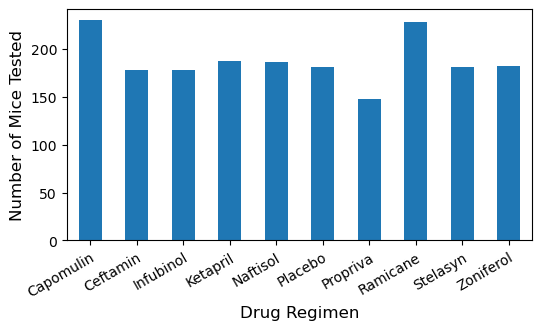

In [1051]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
mice_per_drug_reg = mouse_and_study_clean.groupby('Drug Regimen').count()['Timepoint']
bar_plot_pd = mice_per_drug_reg.plot(kind='bar', figsize=(6,3))
bar_plot_pd.set_xlabel('Drug Regimen', fontsize = 12)
bar_plot_pd.set_ylabel('Number of Mice Tested', fontsize = 12)

# Configure x-tick rotation
xticklabels = mice_per_drug_reg.index
bar_plot_pd.set_xticklabels(xticklabels, rotation=30, rotation_mode = 'anchor', ha='right', wrap=True)

#display bar chart using pandas
plt.show()

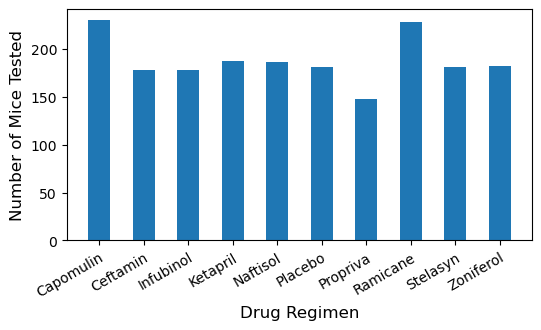

In [1052]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
dr_types = mouse_and_study_clean.groupby('Drug Regimen')
dr_types_count = dr_types.count()
x_axis = dr_types_count.index.values

plt.bar(x_axis, mice_per_drug_reg, width = 0.5)
plt.rcParams['figure.figsize'] = (6,3)
plt.xlabel('Drug Regimen', fontsize = 12)
plt.ylabel('Number of Mice Tested', fontsize = 12)
plt.xticks(xticklabels, rotation= 30, rotation_mode = 'anchor', ha = 'right', wrap=True)

#display bar chart using pyplot
plt.show()

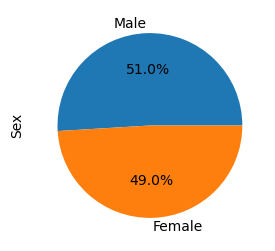

In [1053]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mice_sex_count = mouse_and_study_clean['Sex'].value_counts()
pie_plot = mice_sex_count.plot(kind='pie', autopct='%1.1f%%')

plt.show()

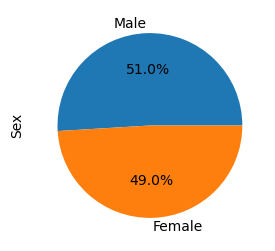

In [1054]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
mice_sex_count2 = mice_sex_count.value_counts()
mice_sex_labels= mouse_and_study_clean['Sex'].unique()

plt.pie( mice_sex_count, labels=mice_sex_labels, autopct='%1.1f%%')
plt.ylabel('Sex')
plt.show()

## Quartiles, Outliers and Boxplots

In [1055]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
greatest_timepoints = mouse_and_study_clean.groupby('Mouse ID').max()['Timepoint']
greatest_timepoints.head()

Mouse ID
a203    45
a251    45
a262    45
a275    45
a366    30
Name: Timepoint, dtype: int64

In [1056]:
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
tumor_volume = pd.merge(greatest_timepoints, mouse_and_study_clean, on=('Mouse ID', 'Timepoint'))
tumor_volume.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1


In [1057]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatments:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    volume = tumor_volume.loc[tumor_volume['Drug Regimen']==drug]['Tumor Volume (mm3)']
    
    # add subset 
    tumor_vol_data.append(volume)
    
    # Determine outliers using upper and lower bounds
    quartile = volume.quantile([0.25,0.5,0.75])
    lowerq = quartile[0.25]
    upperq = quartile[0.75]
    iqr = upperq - lowerq
    
#display results
print(f"The lower quartile is: {round(lowerq,2)}")
print(f"The upper quartile is: {round(upperq,2)}")
print(f"The interquartile range is: {round(iqr,2)}")
print(f"The the median is: {round(quartile[0.5],2)} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {round(lower_bound,3)} could be outliers.")
print(f"Values above {round(upper_bound,3)} could be outliers.")

The lower quartile is: 48.72
The upper quartile is: 64.3
The interquartile range is: 15.58
The the median is: 59.85 
Values below 25.355 could be outliers.
Values above 87.666 could be outliers.


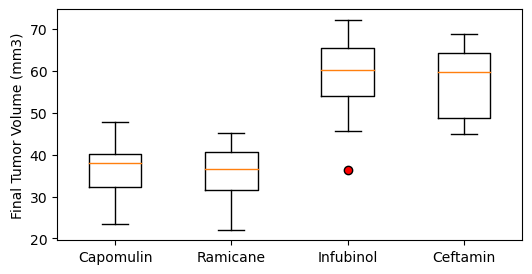

In [1058]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
#creating the red circle
red_circle = dict(markerfacecolor = "r", marker = "o") 

fig1, ax1 = plt.subplots()
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.boxplot(tumor_vol_data, flierprops=red_circle) #flierprops to add the red circle
ax1.set_xticklabels(treatments)

#display box chart
plt.show()

## Line and Scatter Plots

In [1059]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

#getting all mice that treated with Capomulin and their respective data
capomulin_mice = mouse_and_study_clean.loc[mouse_and_study_clean["Drug Regimen"] == "Capomulin"] 
capomulin_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
...,...,...,...,...,...,...,...,...
440,i557,Capomulin,Female,1,24,45,47.685963,1
1452,r157,Capomulin,Male,22,25,0,45.000000,0
1453,r157,Capomulin,Male,22,25,5,45.597064,0
1454,r157,Capomulin,Male,22,25,10,46.059608,0


In [1060]:
#Retrieving data from mice with ID l509
l509_mouse = mouse_and_study_clean.loc[mouse_and_study_clean['Mouse ID'] =='l509']

#display data
l509_mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
371,l509,Capomulin,Male,17,21,0,45.000000,0
372,l509,Capomulin,Male,17,21,5,45.851193,0
373,l509,Capomulin,Male,17,21,10,46.759074,0
374,l509,Capomulin,Male,17,21,15,47.488599,1
375,l509,Capomulin,Male,17,21,20,48.070452,2
376,l509,Capomulin,Male,17,21,25,44.006257,2
377,l509,Capomulin,Male,17,21,30,44.708055,2
378,l509,Capomulin,Male,17,21,35,40.207288,2
379,l509,Capomulin,Male,17,21,40,40.770813,2
380,l509,Capomulin,Male,17,21,45,41.483008,3


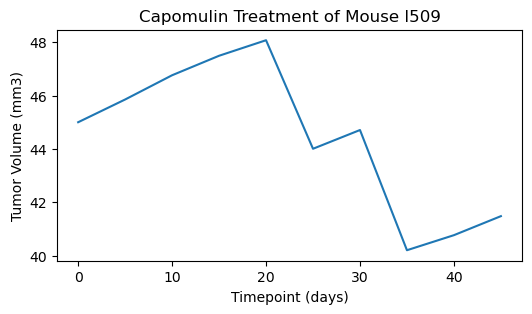

In [1061]:
l509_line_chart = plt.plot(l509_mouse['Timepoint'], l509_mouse['Tumor Volume (mm3)'])
plt.ylabel('Tumor Volume (mm3)')
plt.xlabel('Timepoint (days)')
plt.title('Capomulin Treatment of Mouse l509')

#display results
plt.show()

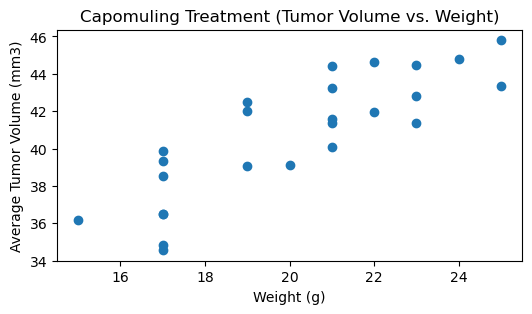

In [1062]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
#calculating the mean for each unique mouse ID
mice_capo_ave = capomulin_mice.groupby('Mouse ID').mean()

capomuline_scatter_chart = plt.scatter(mice_capo_ave['Weight (g)'], mice_capo_ave['Tumor Volume (mm3)'])
plt.ylabel('Average Tumor Volume (mm3)')
plt.xlabel('Weight (g)')
plt.title('Capomuling Treatment (Tumor Volume vs. Weight)')

#display results
plt.show()

## Correlation and Regression

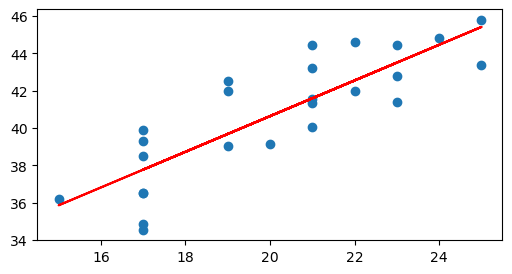

The correlation between mouse weight and the average tumor volume is 0.84


In [1063]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

x_axis = mice_capo_ave["Weight (g)"]
y_axis = mice_capo_ave["Tumor Volume (mm3)"]

#calculating the correlation
corr = x_axis.corr(y_axis)

#calculating the regression line/regress values
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept

#plotting
plt.scatter(x_axis, y_axis)
plt.plot(x_axis,regress_values, 'red')

#display results
plt.show()

#printing results
print(f'The correlation between mouse weight and the average tumor volume is {round(corr,2)}')
